# Geometry Data
---
US State Boundaries as geojson polygon from https://public.opendatasoft.com/explore/dataset/us-state-boundaries/export/

In [1]:
# Dependencies
import pandas as pd
import geopandas as gpd
import shapely as shp
import fns as f

## 1 Load California Geometry
---

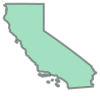

In [2]:
# Read California state boundary geojson
gdf = gpd.read_file('../outputs/shapes/ca_shape.geojson')
gdf.geometry[0]

## 2 Create Grid Array
---

In [7]:
# Get California state bounds
f.CAbounds()
# Create grid size based on NASA GESDISC GPM IMERG cell size
grid_cells = []
grid_size = 0.1
for x in range(-12445,-11405+10,10):
    for y in range(3245, 4195+10,10):
        grid_cells.append(f.polysquare(x,y,5,100))
cells = gpd.GeoDataFrame(grid_cells, columns=['geometry'], crs=4326)
cells.geometry[0], cells.geometry[10079]

(<POLYGON ((-124 32.4, -124 32.5, -124 32.5, -124 32.4, -124 32.4))>,
 <POLYGON ((-114 41.9, -114 42, -114 42, -114 41.9, -114 41.9))>)

## 3 Generate California Grid Array
---

In [8]:
# Creat boolean mask for grid cells based on intersect with CA boundary shape
mask = cells.intersects(gdf['geometry'][0])

In [40]:
# Create list of index for cells covering CA from mask
index = [i for (i, v) in zip(range(0,len(mask)), mask) if v]

In [41]:
# Export list of indices to csv file
pd.Series(index,name='keep').to_csv('../outputs/shapes/ca_grid_index_keep.csv',index=False)

In [42]:
# Create list of index for cells to be dropped from mask
drop = [i for (i, v) in zip(range(0,len(mask)), mask) if not v]

In [43]:
# Export list of indices to csv file
pd.Series(drop,name='drop').to_csv('../outputs/shapes/ca_grid_index_drop.csv',index=False)

<Axes: >

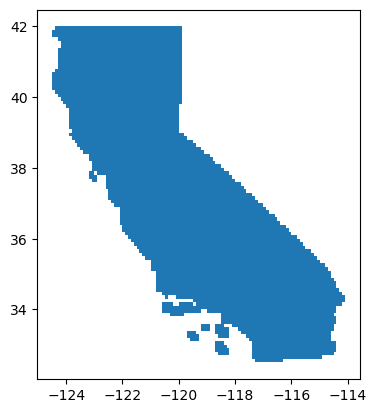

In [44]:
# Filter grid cells by index using drop list
ca_cells = cells.drop(index=drop)
ca_cells.plot()

## 4 Export and Validate Geometry
---

In [45]:
# Write CA cells to geojson file
ca_cells.to_file('../outputs/shapes/ca_grid.geojson', driver='GeoJSON')

In [46]:
# Read CA cells file to check
ca_grid = gpd.read_file('../outputs/shapes/ca_grid.geojson')

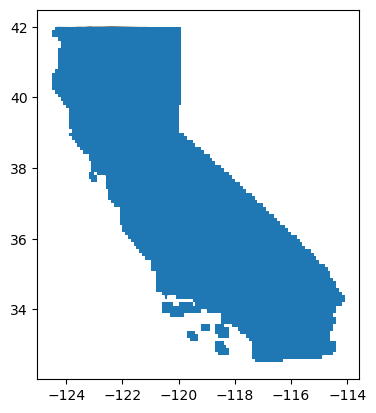

In [47]:
ax=ca_grid.plot( zorder=2)
gdf.plot(ax=ax, color='black', zorder=1)
plt.show()

## 5 Create and Export California Bounding Box
---

In [71]:
bbox = [ca_cells['geometry'].bounds['minx'].min()-0.1,
      ca_cells['geometry'].bounds['miny'].min()-0.1,
      ca_cells['geometry'].bounds['maxx'].max()+0.1,
      ca_cells['geometry'].bounds['maxy'].max()+0.1]
bbox

[-124.6, 32.4, -114.0, 42.1]

In [72]:
bbox_shp = shp.geometry.box(bd[0],bd[1],bd[2],bd[3])

In [73]:
bbox_gdf = gpd.GeoDataFrame([bbox_shp], columns=['geometry'], crs=4326)

In [75]:
bbox_gdf.to_file('../outputs/shapes/ca_bbox.geojson', driver='GeoJSON')